In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('../data/training.csv')

In [6]:
train.head()

,YEAR FORECAST MADE,QUARTER,YEAR BEING FORECAST,INDICATOR,FORECASTER ID,INDUSTRY,Year.ID.ForecastYear.Quarter,Indicator.Year.ID.ForecastYear.Quarter,BIN 1,BIN 2,...,bin_value_sum,TDIST,actual,ACTUAL_BIN,MAX,NUM_OF_MAX,ACTUAL_CONF,HIT,pred_average,pred_var
0,1968,4,1968,NominalGNP,32,NaN,1968-32-1968-4,NominalGNP-1968-32-1968-4,0.0,0.0,...,100.0,0.0,9.40449,2.0,0.50,1.0,0.00,0.0,6.65,0.6275
1,1968,4,1968,NominalGNP,77,NaN,1968-77-1968-4,NominalGNP-1968-77-1968-4,15.0,6.0,...,100.0,0.0,9.40449,2.0,0.15,1.0,0.06,0.0,5.41,13.2419
2,1968,4,1968,NominalGNP,37,NaN,1968-37-1968-4,NominalGNP-1968-37-1968-4,0.0,1.0,...,100.0,0.0,9.40449,2.0,0.25,1.0,0.01,0.0,2.89,4.3579
3,1968,4,1968,NominalGNP,53,NaN,1968-53-1968-4,NominalGNP-1968-53-1968-4,5.0,10.0,...,100.0,0.0,9.40449,2.0,0.40,1.0,0.10,0.0,7.50,2.0000
4,1968,4,1968,NominalGNP,66,NaN,1968-66-1968-4,NominalGNP-1968-66-1968-4,0.0,0.0,...,100.0,0.0,9.40449,2.0,0.95,1.0,0.00,0.0,7.51,0.0499


In [7]:
train.shape

(16217, 64)

In [69]:
train.columns

Index(['YEAR FORECAST MADE', 'QUARTER', 'YEAR BEING FORECAST', 'INDICATOR',
       'FORECASTER ID', 'INDUSTRY', 'Year.ID.ForecastYear.Quarter',
       'Indicator.Year.ID.ForecastYear.Quarter', 'BIN 1', 'BIN 2', 'BIN 3',
       'BIN 4', 'BIN 5', 'BIN 6', 'BIN 7', 'BIN 8', 'BIN 9', 'BIN 10',
       'BIN 11', 'BIN 12', 'BIN 13', 'BIN 14', 'BIN 15', 'BIN 1 prob',
       'BIN 2 prob', 'BIN 3 prob', 'BIN 4 prob', 'BIN 5 prob', 'BIN 6 prob',
       'BIN 7 prob', 'BIN 8 prob', 'BIN 9 prob', 'BIN 10 prob', 'BIN 11 prob',
       'BIN 12 prob', 'BIN 13 prob', 'BIN 14 prob', 'BIN 15 prob',
       'BIN 1 midpoint', 'BIN 2 midpoint', 'BIN 3 midpoint', 'BIN 4 midpoint',
       'BIN 5 midpoint', 'BIN 6 midpoint', 'BIN 7 midpoint', 'BIN 8 midpoint',
       'BIN 9 midpoint', 'BIN 10 midpoint', 'BIN 11 midpoint',
       'BIN 12 midpoint', 'BIN 13 midpoint', 'BIN 14 midpoint',
       'BIN 15 midpoint', 'nbin', 'bin_value_sum', 'TDIST', 'actual',
       'ACTUAL_BIN', 'MAX', 'NUM_OF_MAX', 'ACTUAL_CONF', 'HI

In [95]:

nas = train.isna().sum().reset_index().rename(columns={0:"# NA Values"})
alt.Chart(nas,title="NA Counts for Training Columns").mark_point().encode(
alt.X('index', title='column name'),
alt.Y('# NA Values', title='# of NA values',scale=alt.Scale(domain=(0, 15000))),
tooltip=["index", "# NA Values"]
).properties(
    width=600,
    height=400
).interactive()
   

alt.Chart(...)

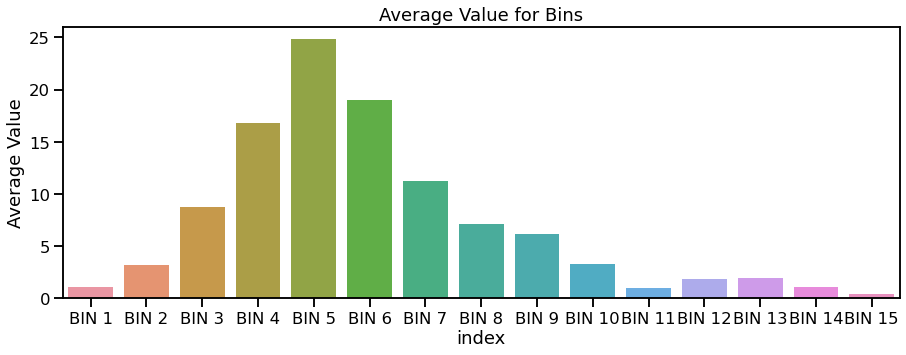

In [67]:
f = plt.figure(figsize=(15, 5))
means = train.iloc[:,8:23].apply(np.mean).reset_index()
ax=sns.barplot(x="index",y=0,data=means)
plt.ylabel("Average Value")
plt.title("Average Value for Bins");

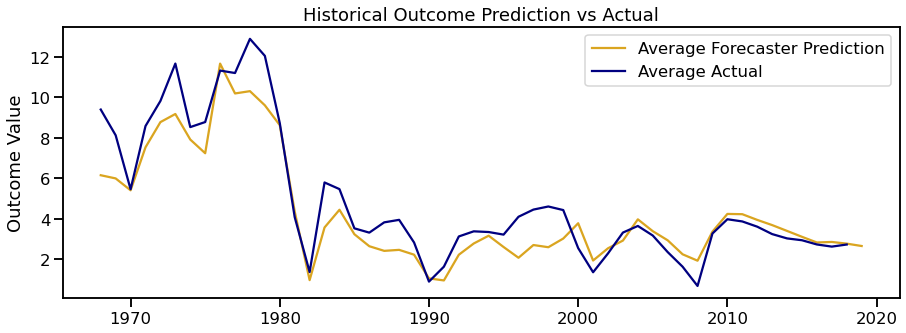

In [90]:
by_year = train.groupby("YEAR FORECAST MADE").mean()
f = plt.figure(figsize=(15, 5))
sns.lineplot(x=np.arange(1968,2020), y= by_year["pred_average"],color="goldenrod",label="Average Forecaster Prediction")
sns.lineplot(x=np.arange(1968,2020),y=by_year["actual"],color="navy",label="Average Actual ")
plt.ylabel("Outcome Value")
plt.title("Historical Outcome Prediction vs Actual");

# MSE of 1.4068

In [88]:
def mse(actual,prediction):
    return np.mean((actual-prediction)**2)
mse(by_year["actual"],by_year["pred_average"])

1.4068750792104312

## Unemployment Regression

In [70]:
unemp = train[train['INDICATOR'] == "Unemployment"] #only look at unemployment for now

In [71]:
unemp.head()

,YEAR FORECAST MADE,QUARTER,YEAR BEING FORECAST,INDICATOR,FORECASTER ID,INDUSTRY,Year.ID.ForecastYear.Quarter,Indicator.Year.ID.ForecastYear.Quarter,BIN 1,BIN 2,...,bin_value_sum,TDIST,actual,ACTUAL_BIN,MAX,NUM_OF_MAX,ACTUAL_CONF,HIT,pred_average,pred_var
6155,2009,2,2009,Unemployment,527,2.0,2009-527-2009-2,Unemployment-2009-527-2009-2,0.0,0.0,...,100.0,0.5,9.283333,4.0,0.60,1.0,0.60,1.0,9.4500,0.060000
6156,2009,2,2009,Unemployment,540,2.0,2009-540-2009-2,Unemployment-2009-540-2009-2,0.0,0.0,...,100.0,0.5,9.283333,4.0,0.40,2.0,0.40,0.5,8.8500,0.140000
6157,2009,2,2009,Unemployment,549,1.0,2009-549-2009-2,Unemployment-2009-549-2009-2,0.0,0.0,...,100.0,0.5,9.283333,4.0,0.55,1.0,0.55,1.0,9.4750,0.061875
6158,2009,2,2009,Unemployment,484,2.0,2009-484-2009-2,Unemployment-2009-484-2009-2,3.0,12.0,...,100.0,0.5,9.283333,4.0,0.27,1.0,0.27,1.0,9.2725,0.656369
6159,2009,2,2009,Unemployment,553,2.0,2009-553-2009-2,Unemployment-2009-553-2009-2,0.0,10.0,...,100.0,0.5,9.283333,4.0,0.45,1.0,0.40,0.0,9.5750,0.175625


In [72]:
unemp['MAX'].value_counts() #their highest confidence in their prediction for unemployment rate

0.5000    393
0.4000    286
0.6000    225
0.3500    154
0.4500    146
         ... 
0.2827      1
0.4680      1
0.4634      1
0.2200      1
0.9992      1
Name: MAX, Length: 202, dtype: int64

In [73]:
unemp['HIT'].value_counts() #how many times they were accurate

0.000000    1271
1.000000     713
0.500000     143
0.333333       9
0.250000       2
0.200000       1
Name: HIT, dtype: int64

In [182]:
np.random.seed(0)
unemp_rand = unemp.sample(frac = 1)
#80/20 split
train = unemp_rand[:2704]
val = unemp_rand[2704:]

#filling na with 0 bc they replaced 0s with na in the original R code but we should definitely look into this more
train = train.fillna(0)
val = val.fillna(0)

X_train, Y_train = train[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT"]], train[["actual"]]
X_val, Y_val = val[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT"]], val[["actual"]]

In [184]:
lr = LinearRegression()
fitted = lr.fit(X_train, Y_train)
pred = fitted.predict(X_val)
pred = pred.flatten()

In [186]:
diffs = np.subtract(np.array(Y_val['actual'].tolist()), pred)
print("Differences in actual unemployment rate vs. model prediction")
print("Mean: " + str(np.mean(diffs)))
print("Median: " + str(np.median(diffs)))
print("Max: " + str(max(diffs)))
print("Min: " + str(min(diffs)))

Differences in actual unemployment rate vs. model prediction
Mean: -0.11313845729614412
Median: -0.04941656910178516
Max: 5.980928386245965
Min: -4.924484858853711


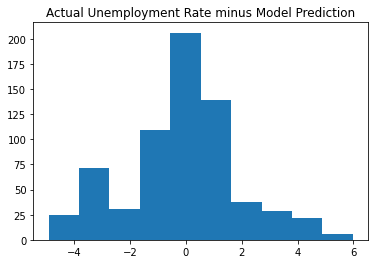

In [187]:
plt.hist(diffs)
plt.title("Actual Unemployment Rate minus Model Prediction")
plt.show()

In [188]:
actual_diffs = np.subtract(np.array(Y_val['actual'].tolist()), np.array(X_val['pred_average'].tolist()))
print("Differences in actual unemployment rate vs. forecaster average prediction")
print("Mean: " + str(np.mean(actual_diffs)))
print("Median: " + str(np.median(actual_diffs)))
print("Max: " + str(max(actual_diffs)))
print("Min: " + str(min(actual_diffs)))

Differences in actual unemployment rate vs. forecaster average prediction
Mean: 0.08545953981755335
Median: -0.375
Max: 9.60833333333333
Min: -6.0753


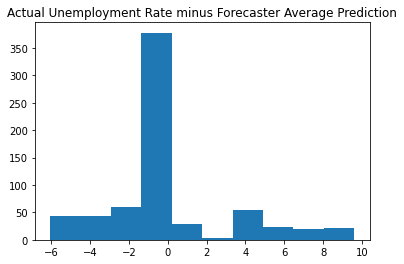

In [189]:
plt.hist(actual_diffs)
plt.title("Actual Unemployment Rate minus Forecaster Average Prediction")
plt.show()